# Health Insurance Cost Prediction


There are many factors that affect how much health insurance companies charge us. Here are some of the major factors considered by the companies in USA that affect how much health insurance premium cost.


* **age:**  age of primary beneficiary

* **sex:**  insurance contractor gender, female, male

* **bmi:**  Body mass index is a value derived from the mass and height of a person. The BMI is defined as the body mass divided by the square of the body height, and is universally expressed in units of kg/m², resulting from mass in kilograms and height in metres

* **children:**  Number of children covered by health insurance / Number of dependents

* **smoker:**  Smoking

* **region:**  the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

My goal is to predict the premium cost for Health Insurance base on above factors.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
plt.style.use('seaborn-poster')

In [6]:
df=pd.read_csv('insurance.csv')
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
521,32,female,44.220,0,no,southeast,3994.17780
1323,42,female,40.370,2,yes,southeast,43896.37630
812,54,male,21.010,2,no,southeast,11013.71190
1310,42,male,26.315,1,no,northwest,6940.90985
764,45,female,25.175,2,no,northeast,9095.06825


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Visualization and EDA

region
southwest    12346.937377
northwest    12417.575374
northeast    13406.384516
southeast    14735.411438
Name: charges, dtype: float64


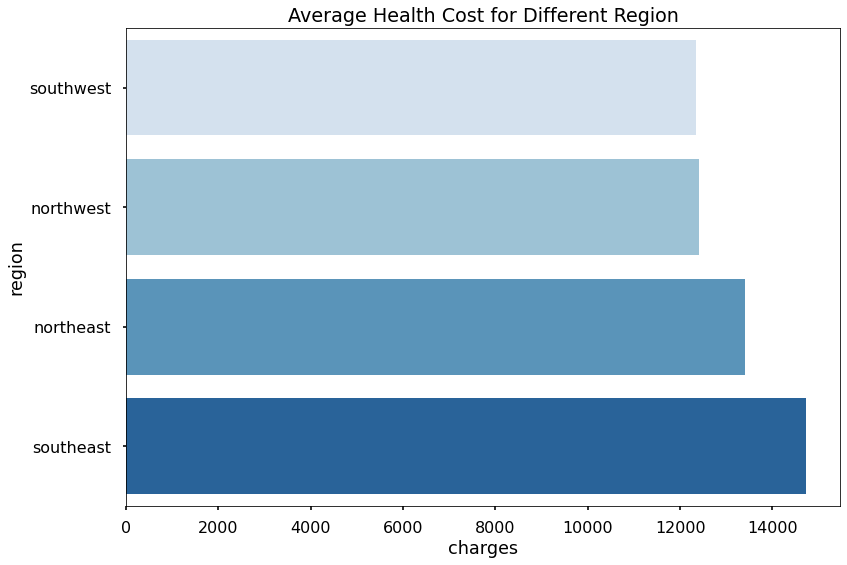

In [8]:
charges = df['charges'].groupby(df.region).mean().sort_values(ascending = True)
print(charges)

sns.barplot(x=charges, y=charges.head().index, palette='Blues')
plt.title("Average Health Cost for Different Region")
plt.show()

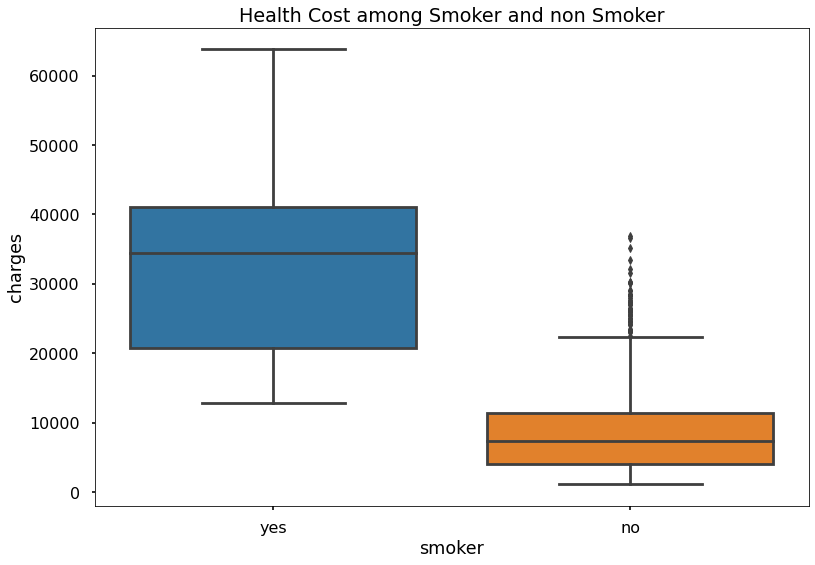

In [9]:
sns.boxplot(x=df['smoker'],y=df['charges'])
plt.title('Health Cost among Smoker and non Smoker')
plt.show()

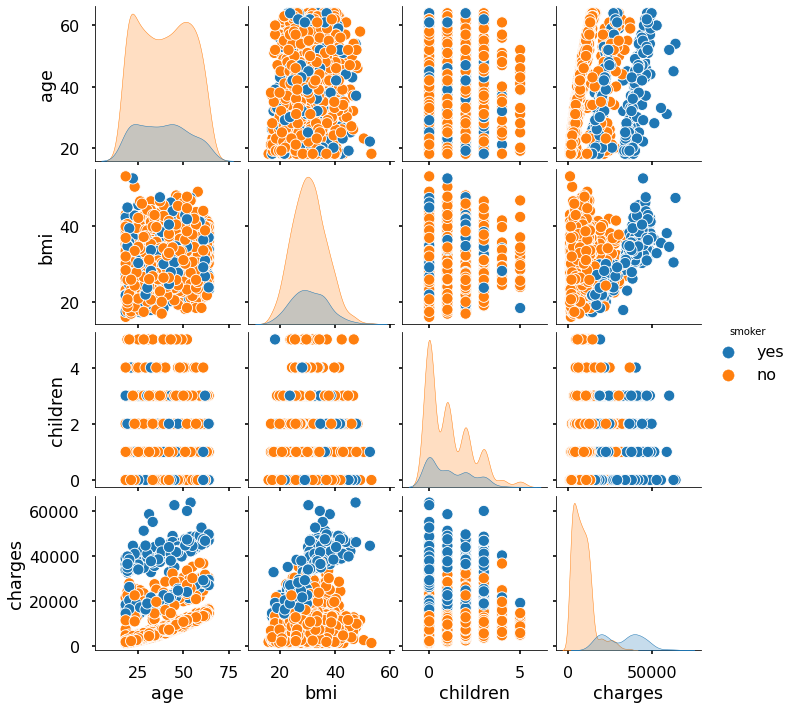

In [5]:
sns.pairplot(data=df, hue='smoker')

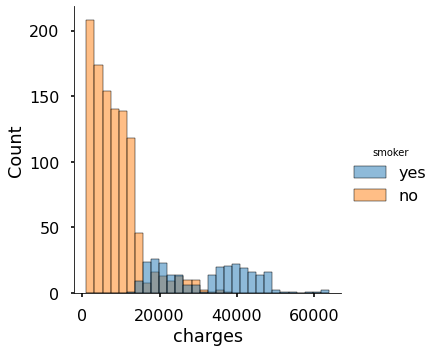

In [6]:
sns.displot(df,x='charges',hue='smoker')
plt.show()

In [17]:

df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


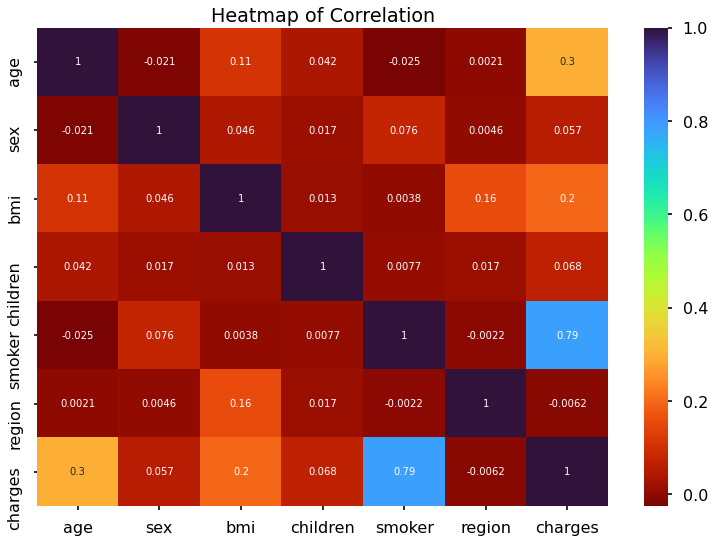

In [18]:
sns.heatmap(df.corr(),annot=True,cmap='turbo_r')
plt.title("Heatmap of Correlation")
plt.show()

In [19]:
'''df_copy=df.copy()
df['smoker']=df['smoker'].map({'yes':1,'no':0})
#df.drop('sex',axis=1,inplace=True)
df=pd.get_dummies(df,columns=['region','sex'])
df=df[df.columns[[0,1,2,3,5,6,7,8,9,10,4]]] #rearranging columns
df.head()'''

"df_copy=df.copy()\ndf['smoker']=df['smoker'].map({'yes':1,'no':0})\n#df.drop('sex',axis=1,inplace=True)\ndf=pd.get_dummies(df,columns=['region','sex'])\ndf=df[df.columns[[0,1,2,3,5,6,7,8,9,10,4]]] #rearranging columns\ndf.head()"

![BMI](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fimages.agoramedia.com%2Feverydayhealth%2Fgcms%2FBMI-in-Adults-722x406.jpg&f=1&nofb=1)

### Observations

* smokers are charged more than non smoker.
* people with unhealthy BMI (greater than 25) are charged more
* There are less number of people who have to pay high premium.
* Premium amount for older people is greater than the young ones.
* People living in southeast have highest medical cost and southwest have lowest.
* Sex, number of children and region are factors with lowest impact in medical cost.
* Smoking, bmi and age factors have highest impact in medical cost.

## Prediction Model

In [20]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = df.drop('charges',axis=1)
y=df['charges']

X2=df.drop(['charges','sex','region'],axis=1) #dropping features with lowest impact.
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


## LinearRegression Model

In [21]:
lin_reg1=LinearRegression()
lin_reg1.fit(X_train,y_train)

lin_reg2=LinearRegression()
lin_reg2.fit(X2_train,y2_train)


LinearRegression()

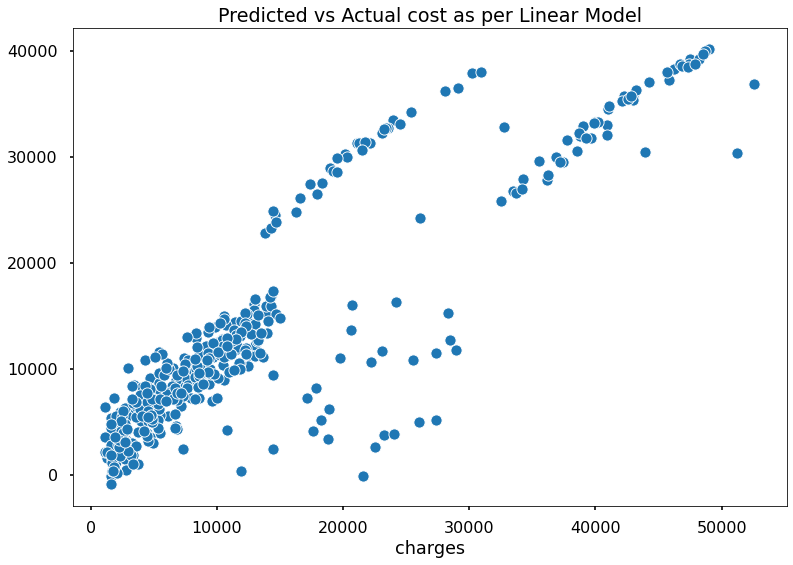

In [22]:
y_pred1=lin_reg1.predict(X_test)
y_pred2=lin_reg2.predict(X2_test)

df2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred1})
sns.scatterplot(x=y_test,y=y_pred1)
plt.title("Predicted vs Actual cost as per Linear Model")
plt.show()

In [23]:
print("Metrics for Model 1")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print("R2 score: ",metrics.r2_score(y_test, y_pred1))
print("\n")
print("Metrics for Model 2")
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y_pred2)))
print("R2 score: ",metrics.r2_score(y2_test, y_pred2))

Metrics for Model 1
Mean Absolute Error: 4013.692985781198
Mean Squared Error: 33311355.281859968
Root Mean Squared Error: 5771.599022962351
R2 score:  0.7911113876316933


Metrics for Model 2
Mean Absolute Error: 4036.5030898216387
Mean Squared Error: 35650017.22667821
Root Mean Squared Error: 5970.763537997314
R2 score:  0.76118793890636


Model trained with more features performed better than the model with only important features. 

## PolynomialRegression Model

In [24]:
from sklearn.preprocessing import PolynomialFeatures
lin_reg=LinearRegression()
for i in [2,3,4,5]:
    poly_reg=PolynomialFeatures(degree=i)

    X_poly=poly_reg.fit_transform(X_train)

    lin_reg.fit(X_poly,y_train)
    y_pred_poly=lin_reg.predict(poly_reg.fit_transform(X_test))

    print("Degree: ",i)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_poly))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_poly))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))
    print("R2 score: ",metrics.r2_score(y_test, y_pred_poly))
    print("\n")
    
#Best degree 2
poly_reg=PolynomialFeatures(degree=2)

X_poly=poly_reg.fit_transform(X_train)

lin_reg.fit(X_poly,y_train)
y_pred_poly=lin_reg.predict(poly_reg.fit_transform(X_test))

Degree:  2
Mean Absolute Error: 2855.524562864607
Mean Squared Error: 20028939.39895565
Root Mean Squared Error: 4475.370308584045
R2 score:  0.87440266771328


Degree:  3
Mean Absolute Error: 2960.9520600734304
Mean Squared Error: 20929719.491702266
Root Mean Squared Error: 4574.901036274147
R2 score:  0.8687540622443425


Degree:  4
Mean Absolute Error: 3303.8249862339067
Mean Squared Error: 27741891.441293094
Root Mean Squared Error: 5267.057189863529
R2 score:  0.8260363423039824


Degree:  5
Mean Absolute Error: 4501.9178301011925
Mean Squared Error: 54578558.3521959
Root Mean Squared Error: 7387.730257135537
R2 score:  0.6577491602252132




Polynomial Regression of Degree 2 performed better.

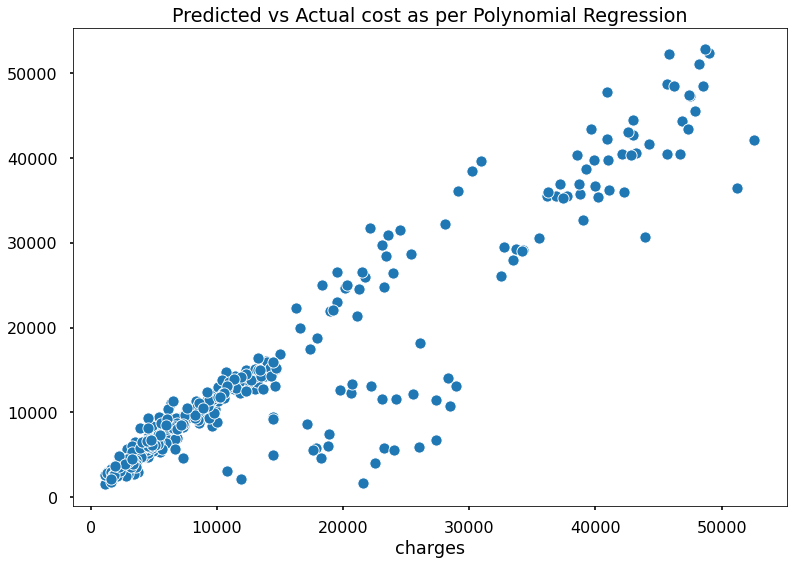

In [25]:
y_pred_poly=lin_reg.predict(poly_reg.fit_transform(X_test))
df3=pd.DataFrame({'Actual':y_test,'Predicted':y_pred_poly})

sns.scatterplot(x=y_test,y=y_pred_poly)
plt.title("Predicted vs Actual cost as per Polynomial Regression")
plt.show()

In [64]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_poly))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_poly))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))
print("R2 score: ",metrics.r2_score(y_test, y_pred_poly))

Mean Absolute Error: 2855.524562864607
Mean Squared Error: 20028939.39895565
Root Mean Squared Error: 4475.370308584045
R2 score:  0.87440266771328


## RandomForestRegressor Model

In [33]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(
    n_estimators = 1100,
    max_depth = 4,
    random_state = 1,
    max_leaf_nodes=1000
)

rfr.fit(X_train, y_train)


RandomForestRegressor(max_depth=4, max_leaf_nodes=1000, n_estimators=1100,
                      random_state=1)

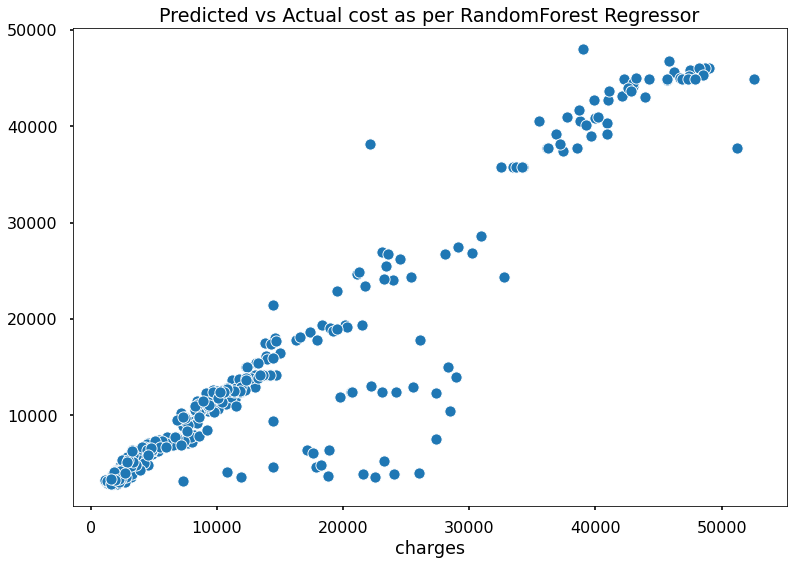

In [34]:
y_pred_rf=rfr.predict(X_test)
df3=pd.DataFrame({'Actual':y_test,'Predicted':y_pred_rf})

sns.scatterplot(x=y_test,y=y_pred_rf)
plt.title("Predicted vs Actual cost as per RandomForest Regressor")
plt.show()

In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print("R2 score: ",metrics.r2_score(y_test, y_pred_rf))

Mean Absolute Error: 2494.4582408483166
Mean Squared Error: 17609514.276676927
Root Mean Squared Error: 4196.369177834205
R2 score:  0.889574381750296


In [36]:
rfr2 = RandomForestRegressor(
    n_estimators = 700,
    max_depth = 4,
    random_state = 1,
    max_leaf_nodes=1000
)

rfr2.fit(X2_train, y2_train)

y_pred2=rfr2.predict(X2_test)

print("Metrics for Model 2")
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y_pred2)))
print("R2 score: ",metrics.r2_score(y2_test, y_pred2))

Metrics for Model 2
Mean Absolute Error: 2422.455719960309
Mean Squared Error: 18610480.668552242
Root Mean Squared Error: 4313.986632866662
R2 score:  0.8753322552934311


For RandomForest Regressor too model trained with all features performed better.

Mean Absolute Error: 2461.2990118276616
Mean Squared Error: 19048537.765107304
Root Mean Squared Error: 4364.463055761534
R2 score:  0.8648907958535507


Text(0.5, 1.0, 'Predicted vs Actual cost as per RandomForest Regressor on Training Data')

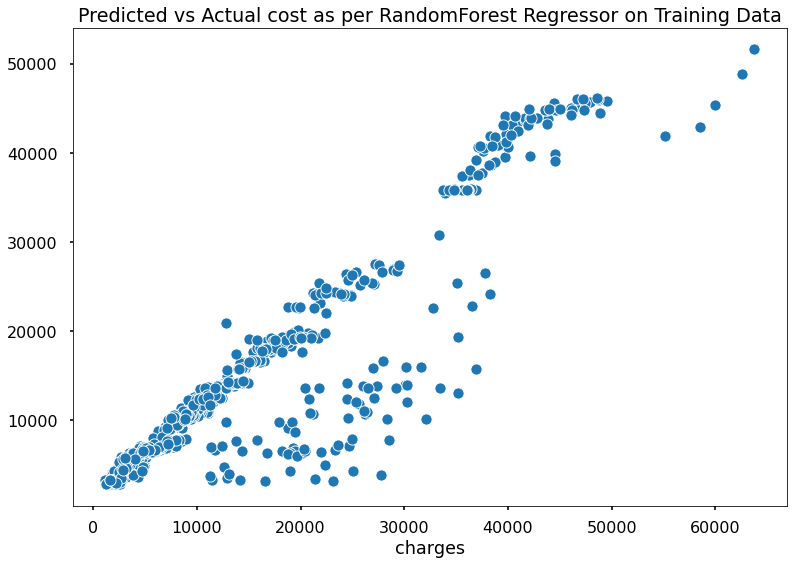

In [38]:
y_pred_rf_train=rfr.predict(X_train)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_rf_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_rf_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_rf_train)))
print("R2 score: ",metrics.r2_score(y_train, y_pred_rf_train))

sns.scatterplot(x=y_train,y=y_pred_rf_train)
plt.title("Predicted vs Actual cost as per RandomForest Regressor on Training Data")


## Ridge Regression

In [39]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge

alphas = [0.1000001, 0.0001, 0.0001, 0.001, 0.01, 0.1,0.5, 0.0000002]

for a in alphas:
 ridge_reg = Ridge(alpha=a, normalize=True,fit_intercept=True,max_iter=1000).fit(X_train,y_train) 
 score = ridge_reg.score(X_test, y_test)
 pred_y = ridge_reg.predict(X_test)
 mse = metrics.mean_squared_error(y_test, pred_y) 
 print("Alpha:{0:.6f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(a, score, mse, np.sqrt(mse)))

Alpha:0.100000, R2:0.778, MSE:35350923.73, RMSE:5945.66
Alpha:0.000100, R2:0.791, MSE:33312493.60, RMSE:5771.70
Alpha:0.000100, R2:0.791, MSE:33312493.60, RMSE:5771.70
Alpha:0.001000, R2:0.791, MSE:33322838.31, RMSE:5772.59
Alpha:0.010000, R2:0.790, MSE:33435959.48, RMSE:5782.38
Alpha:0.100000, R2:0.778, MSE:35350920.96, RMSE:5945.66
Alpha:0.500000, R2:0.684, MSE:50375629.08, RMSE:7097.58
Alpha:0.000000, R2:0.791, MSE:33311357.56, RMSE:5771.60


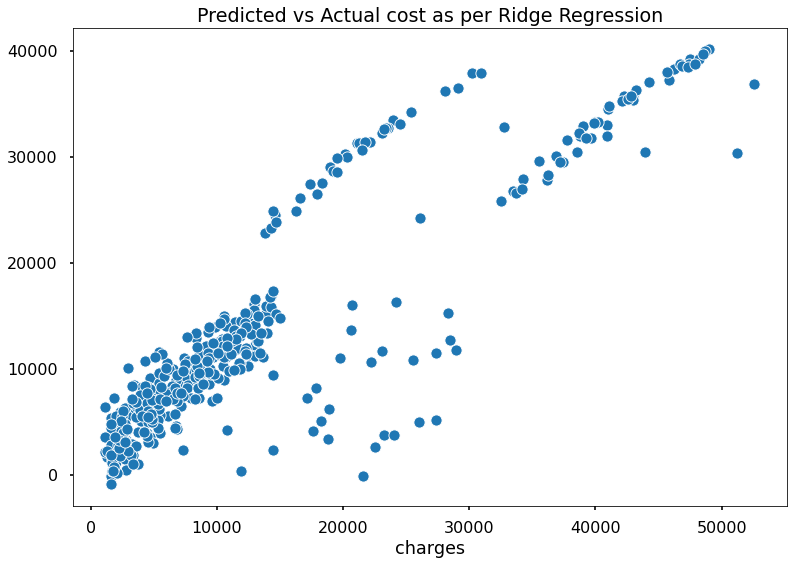

In [47]:
y_pred_rd=lasso_reg.predict(X_test)
df3=pd.DataFrame({'Actual':y_test,'Predicted':y_pred_rd})

sns.scatterplot(x=y_test,y=y_pred_rd)
plt.title("Predicted vs Actual cost as per Ridge Regression")
plt.show()

Ridge Regression with alpha 0.0001 performed better among all alpha taken. But, still could not perform better than Random Forest Regressor.

## Lasso Regression

In [43]:
from sklearn.linear_model import Lasso

alphas = [0.1000001, 0.0001, 0.0001, 0.001, 0.01, 0.1,0.5, 0.0000002]

for a in alphas:
    lasso_reg = Lasso(alpha=0.2, fit_intercept=True, normalize=True, precompute=True, max_iter=10000,
                  tol=0.0001, warm_start=False, positive=False, random_state=1, selection='cyclic'
                ).fit(X_train, y_train)
    y_pred_ls=lasso_reg.predict(X_test)
    mse = metrics.mean_squared_error(y_test, pred_y)
    score = lasso_reg.score(X_test, y_test)
    print("Alpha:{0:.6f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}"
        .format(a, score, mse, np.sqrt(mse)))

Alpha:0.100000, R2:0.791, MSE:33311357.56, RMSE:5771.60
Alpha:0.000100, R2:0.791, MSE:33311357.56, RMSE:5771.60
Alpha:0.000100, R2:0.791, MSE:33311357.56, RMSE:5771.60
Alpha:0.001000, R2:0.791, MSE:33311357.56, RMSE:5771.60
Alpha:0.010000, R2:0.791, MSE:33311357.56, RMSE:5771.60
Alpha:0.100000, R2:0.791, MSE:33311357.56, RMSE:5771.60
Alpha:0.500000, R2:0.791, MSE:33311357.56, RMSE:5771.60
Alpha:0.000000, R2:0.791, MSE:33311357.56, RMSE:5771.60


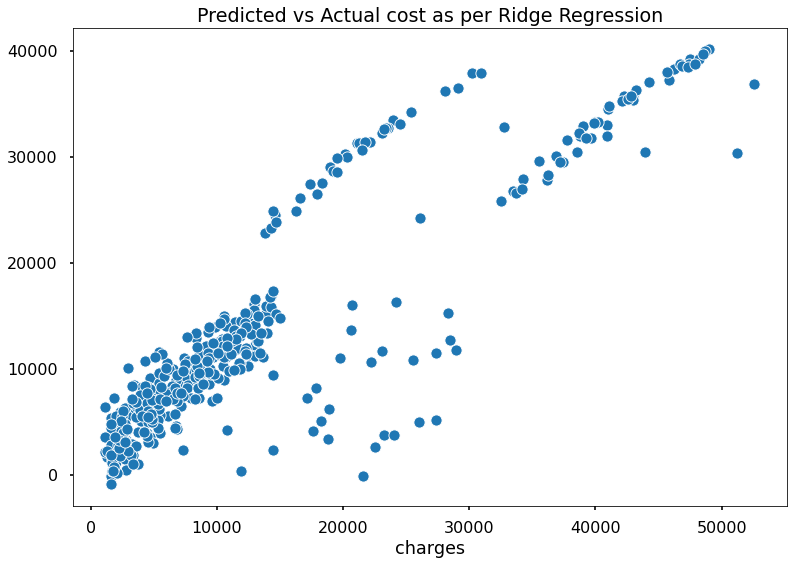

In [45]:
y_pred_ls=lasso_reg.predict(X_test)
df3=pd.DataFrame({'Actual':y_test,'Predicted':y_pred_ls})

sns.scatterplot(x=y_test,y=y_pred_ls)
plt.title("Predicted vs Actual cost as per Laso Regression")
plt.show()

In [98]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ls))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ls))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ls)))
print("R2 score: ",metrics.r2_score(y_test, y_pred_ls))

Mean Absolute Error: 4014.2896648011065
Mean Squared Error: 33324963.61194494
Root Mean Squared Error: 5772.777807255788
R2 score:  0.7910260526111261


# Conclusion

In our problem to predict insurance premium to be paid, RandomForest Regressor algorithm performed best with the following errors and scores on train and test data. In all algorithms used, models trained with all features performed better than models trained with only important features.

### Train Data

- Mean Absolute Error: 2461.2990118276616
- Mean Squared Error: 19048537.765107304
- Root Mean Squared Error: 4364.463055761534
- R2 score:  0.8648907958535507

### Test Data
- Mean Absolute Error: 2494.4582408483166
- Mean Squared Error: 17609514.276676927
- Root Mean Squared Error: 4196.369177834205
- R2 score:  0.889574381750296

Performance was better for test data than training data.

In [127]:
y_pred_rf_train=rfr.predict(X)
df_all=pd.DataFrame({'Actual':y_test,'Predicted':y_pred_rf})
df_all.head(10)

,Actual,Predicted
578,9724.53000,12620.692925
610,8547.69130,10518.488681
569,45702.02235,44766.650274
1034,12950.07120,14171.654520
198,9644.25250,11465.522406
981,4500.33925,7022.853785
31,2198.18985,3068.153972
1256,11436.73815,11669.935041
1219,7537.16390,7115.869923
1320,5425.02335,6519.039765
